<a href="https://colab.research.google.com/github/Fawad98/Fast.AI_Projects/blob/main/Emergency_Vehivcle_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 7.1 MB/s 
     |████████████████████████████████| 4.9 MB 37.2 MB/s 
     |████████████████████████████████| 432 kB 53.6 MB/s 
     |████████████████████████████████| 1.3 MB 64.4 MB/s 
     |████████████████████████████████| 212 kB 55.0 MB/s 
     |████████████████████████████████| 115 kB 55.4 MB/s 
     |████████████████████████████████| 163 kB 52.5 MB/s 
     |████████████████████████████████| 127 kB 59.1 MB/s 
     |████████████████████████████████| 6.6 MB 54.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

Mounted at /content/gdrive


In [ ]:
Emergency='Police Mobile','Ambulance','Fire Truck'
path= Path('Emergency')
if not path.exists():
  path.mkdir()
  for o in Emergency:
    dest=(path/o)
    dest.mkdir(exist_ok=True)
    urls=search_images_ddg(f'{o} emergency',max_images=200)
    download_images(dest,urls=urls)
    

In [ ]:
fns=get_image_files(path)
fns

(#576) [Path('Emergency/Police Mobile/a4f6b488-6e63-45d8-8282-8e8228251af5.jpg'),Path('Emergency/Police Mobile/97161452-043b-47e8-8126-5bf254e6f869.jpg'),Path('Emergency/Police Mobile/f69b4bc2-af09-4b67-b920-b6e6f57571b9.jpg'),Path('Emergency/Police Mobile/0e641104-e916-42d3-9e6d-4fdd1d430d29.jpg'),Path('Emergency/Police Mobile/e174c6cc-2b9f-4160-bb2d-e549b5c008cf.png'),Path('Emergency/Police Mobile/777400db-8229-4aa3-b5db-b5c76727a97b.jpg'),Path('Emergency/Police Mobile/20349d3d-c822-4a46-9e07-6451231022a3.jpg'),Path('Emergency/Police Mobile/ab83c3c1-d265-43d0-920a-ac097baa240e.jpg'),Path('Emergency/Police Mobile/eed908f6-51f1-4749-b9a6-641f2a46d0e0.jpg'),Path('Emergency/Police Mobile/6774a5b1-f155-44df-adcb-c0a4d5bff59b.jpg')...]

In [ ]:
results= search_images_ddg('ambulance',max_images=150)
ims=results.attrgot('contentUrl')
len(ims)

150

In [ ]:
ims=['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoLw47urRRDmFk0v7yZWPfFRVZcSnTC8ouZo-gvQJcP5l74FYmmnlbifc8cZ47VRcZx7k&usqp=CAU']

In [ ]:
dest='images/ambulance.jpg'
download_url(ims[0],dest)

Path('images/ambulance.jpg')

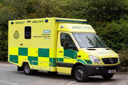

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
fns=get_image_files(path)
fns

(#576) [Path('Emergency/Police Mobile/a4f6b488-6e63-45d8-8282-8e8228251af5.jpg'),Path('Emergency/Police Mobile/97161452-043b-47e8-8126-5bf254e6f869.jpg'),Path('Emergency/Police Mobile/f69b4bc2-af09-4b67-b920-b6e6f57571b9.jpg'),Path('Emergency/Police Mobile/0e641104-e916-42d3-9e6d-4fdd1d430d29.jpg'),Path('Emergency/Police Mobile/e174c6cc-2b9f-4160-bb2d-e549b5c008cf.png'),Path('Emergency/Police Mobile/777400db-8229-4aa3-b5db-b5c76727a97b.jpg'),Path('Emergency/Police Mobile/20349d3d-c822-4a46-9e07-6451231022a3.jpg'),Path('Emergency/Police Mobile/ab83c3c1-d265-43d0-920a-ac097baa240e.jpg'),Path('Emergency/Police Mobile/eed908f6-51f1-4749-b9a6-641f2a46d0e0.jpg'),Path('Emergency/Police Mobile/6774a5b1-f155-44df-adcb-c0a4d5bff59b.jpg')...]

In [ ]:
failed=verify_images(fns)
failed

(#5) [Path('Emergency/Police Mobile/4d01ed63-7d6f-497b-994a-083ac6134978.jpg'),Path('Emergency/Fire Truck/b899a80e-f18d-49be-b1dc-73674c73e125.jpg'),Path('Emergency/Fire Truck/c26aa1e1-dbaf-48bb-a204-9dc6525f93ce.jpg'),Path('Emergency/Ambulance/022395f6-4fe2-4a5b-8b24-508d598d12c0.jpg'),Path('Emergency/Ambulance/e427f7bd-a663-4373-8e4f-6a676968deff.jpg')]

In [ ]:
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

In [ ]:
emergency=  DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
emergency=emergency.new(
item_tfms=RandomResizedCrop(224,min_scale=0.5),
batch_tfms=aug_transforms())
dls=emergency.dataloaders(path)

In [ ]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.730714,1.019595,0.429825,01:44


epoch,train_loss,valid_loss,error_rate,time
0,0.963940,0.463128,0.166667,02:17
1,0.820533,0.405562,0.149123,02:12
2,0.680095,0.383510,0.122807,02:17
3,0.578714,0.374224,0.122807,02:12


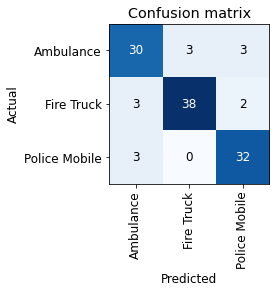

In [ ]:
inter=ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

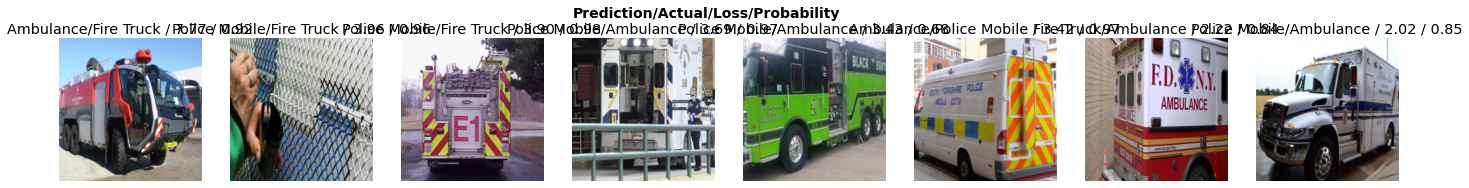

In [ ]:
inter.plot_top_losses(8,nrows=1)

In [ ]:
cleaner=ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

In [ ]:
for idx.cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
!pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 6.6 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 270 kB 46.5 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 54.2 MB/s 
     |████████████████████████████████| 212 kB 47.7 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 2.3 MB 50.4 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 
     |████████████████████████████████| 4.0 MB 42.8 MB/s 
     |████████████████████████████████| 856 kB 36.

In [ ]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://18338.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f23a3f9bb90>,
 'http://127.0.0.1:7860/',
 'https://18338.gradio.app')